# Decision trees

Based on: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from IPython.display import Image  
import pydotplus

## The Iris dataset

In [2]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Train the model

In [3]:
# Create decision tree classifer object
clf = DecisionTreeClassifier(random_state=0)

# Train model
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

## Test the model

In [4]:
#Predict the response for test dataset
y_pred = clf.predict(X_test) #protesterar

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


## Plot the model

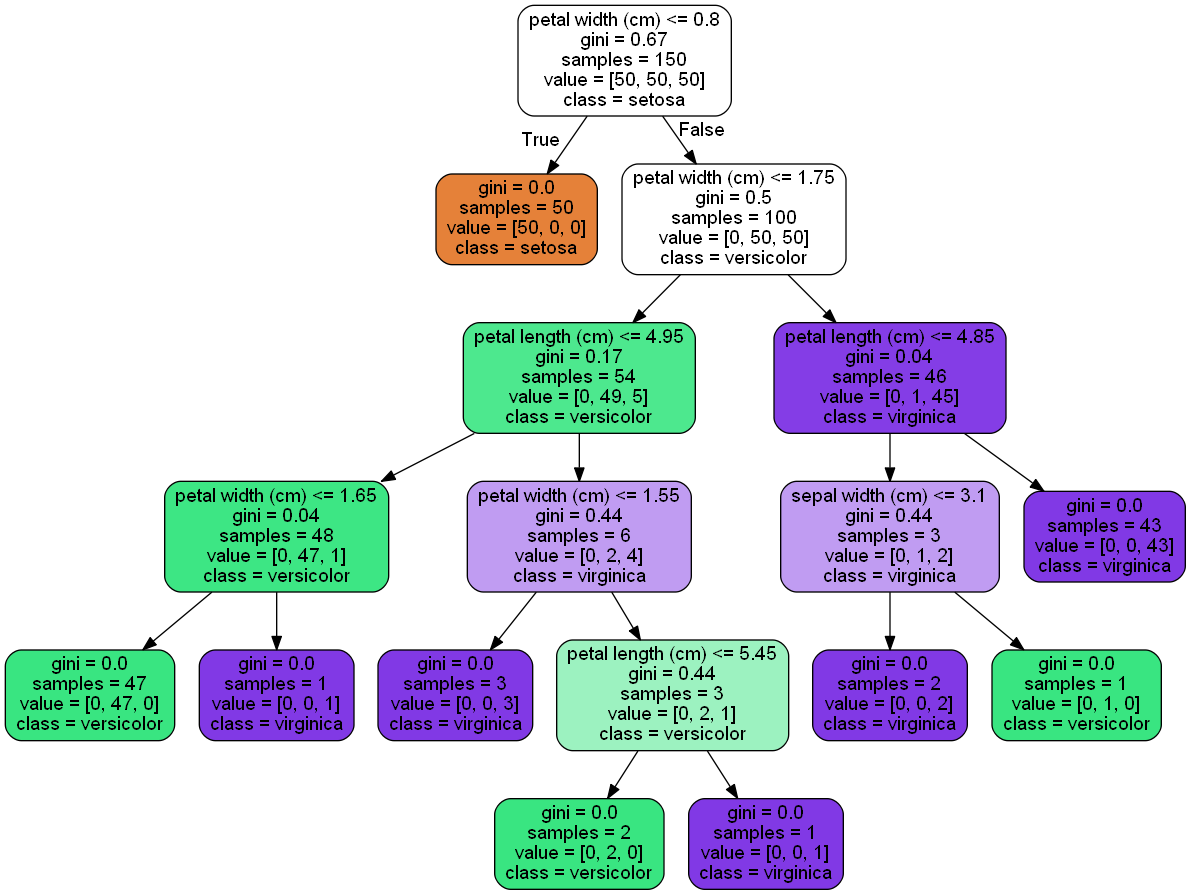

In [5]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, feature_names = iris.feature_names,
                class_names = iris.target_names, #End ) here for plain version
                rounded = True, proportion = False, precision = 2, filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [6]:
# Create PDF
#graph.write_pdf("iris.pdf")

# Create PNG
graph.write_png("iris.png")

True

## The Pima dataset

Available here: https://www.kaggle.com/uciml/pima-indians-diabetes-database/version/1

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes. All patients here are females at least 21 years old of Pima Indian heritage.

In [7]:
pima = pd.read_csv('../datasets/diabetes.csv')
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
#Introduce shorter names:
pima.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = pima[feature_cols] # Features
y = pima['label'] # Targets

## Train the model

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini')

# Train Decision Tree Classifer
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Test the model

In [12]:
y_pred = clf.predict(X_test) 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.70995670995671


## Plot the model

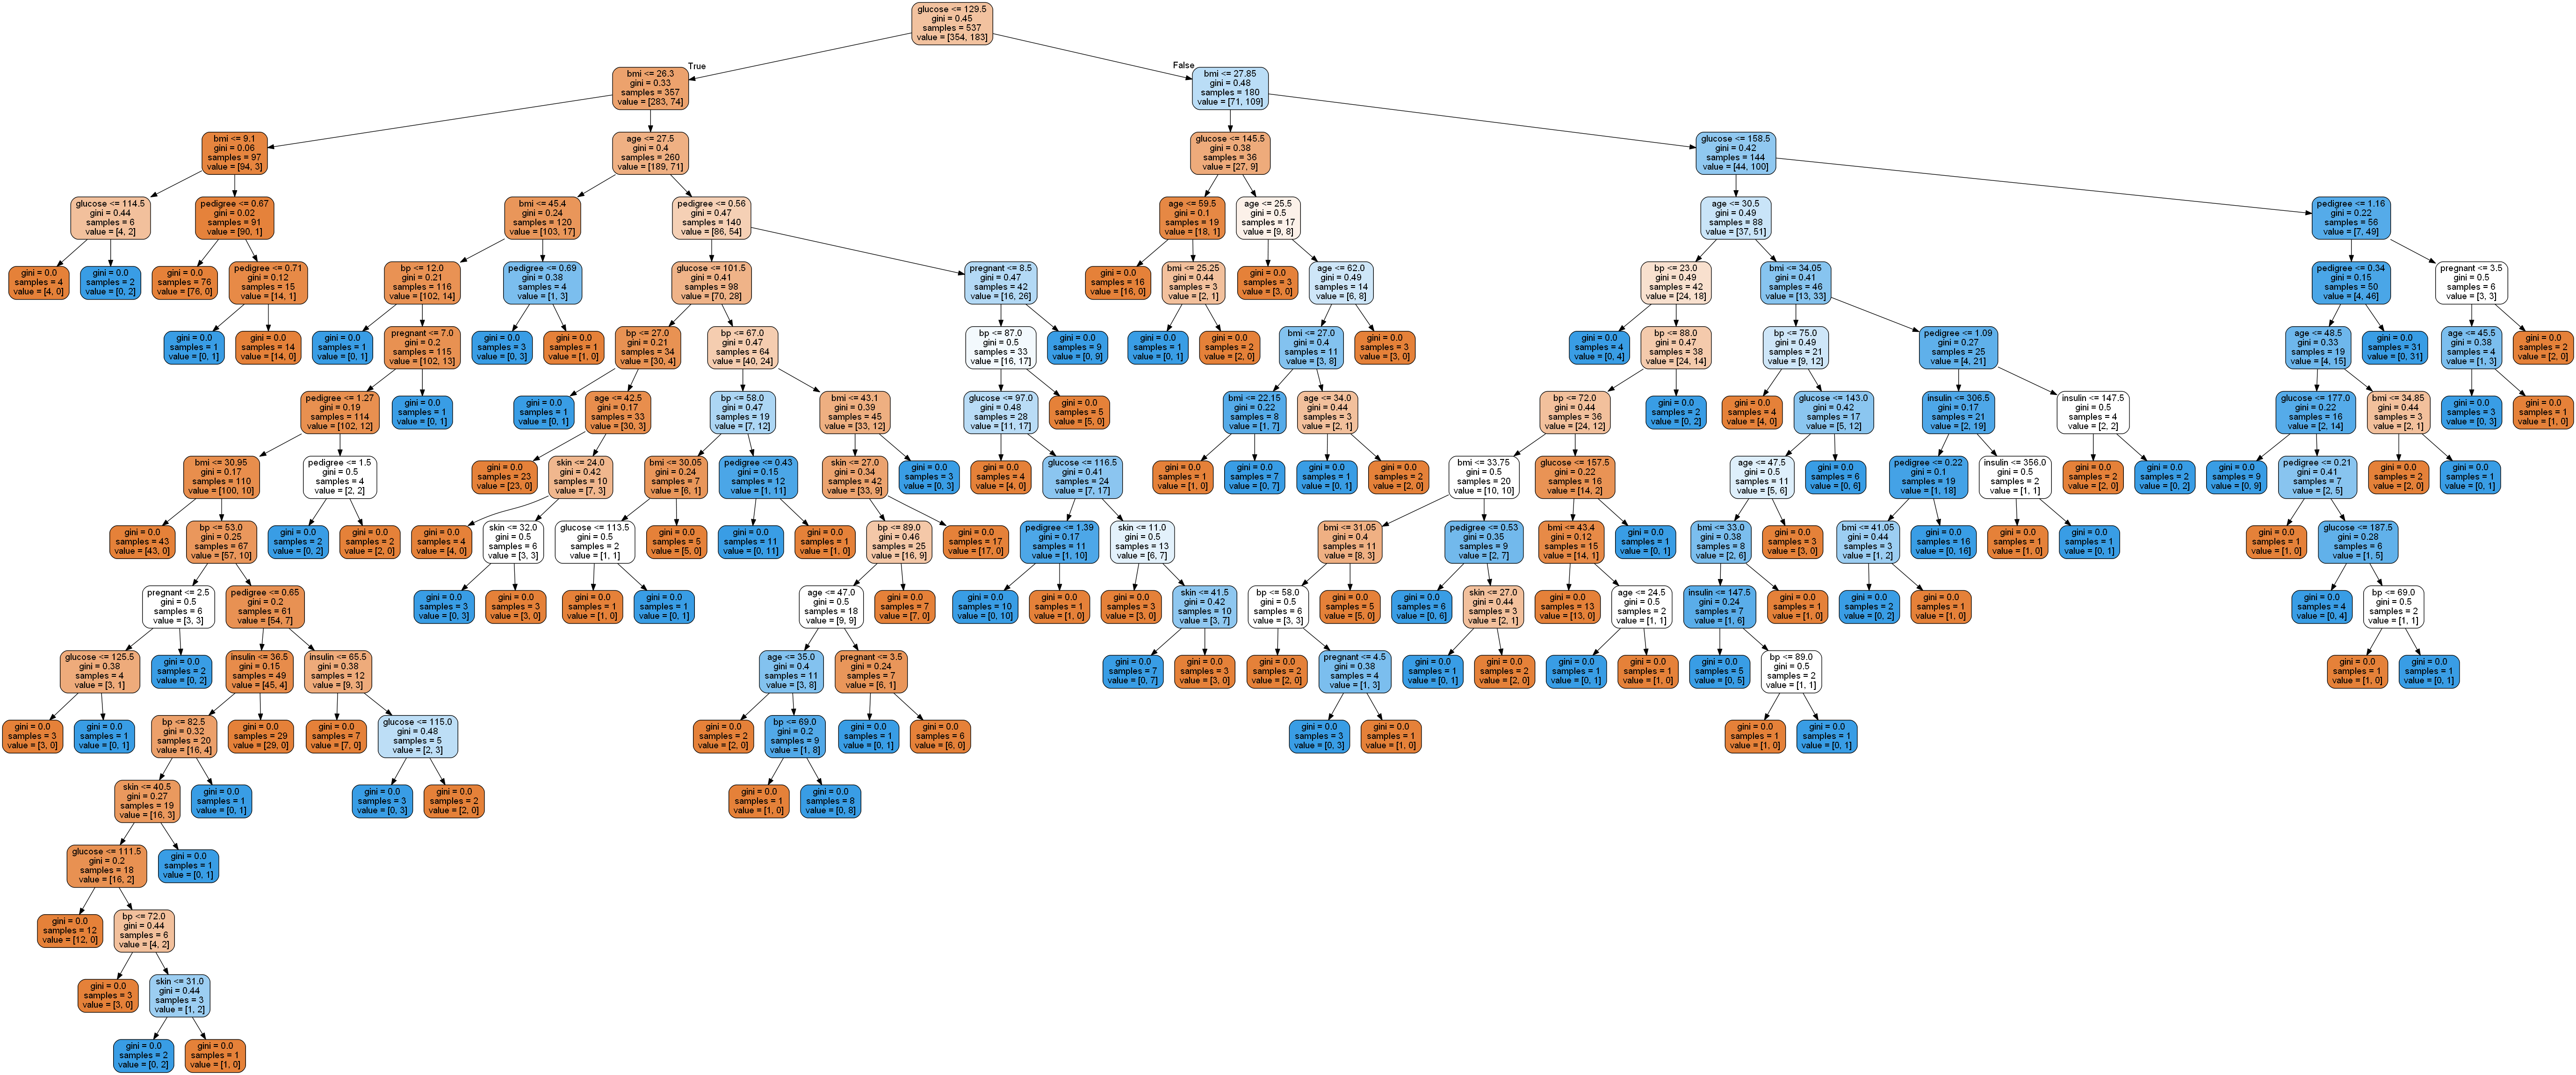

In [13]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, feature_names = feature_cols,
                #class_names = ['diabetes', 'healthy'],
                rounded = True, proportion = False, precision = 2, filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [14]:
# Create PDF
#graph.write_pdf("pima.pdf")

# Create PNG
graph.write_png("pima.png")

True